<a href="https://colab.research.google.com/github/CristopherFoster/ML_Centrogeo_CEFV/blob/Tareas/Tarea3_ML_CristopherFoster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3: Funciones Cuadráticas
## Cristopher Foster$_1$, Hugo Carlos Martínez$_2$ y Beatriz Isabel Cruz Sánchez$_3$
#### 1.- Centrogeo, Alumno: al.cfoster@centrogeo.edu.mx. <p> 2.- Centrogeo, Profesor: hcarlos@centrogeo.edu.mx. <p> 3.- Centrogeo, Profesora Ayudante: al.bcruz@centrogeo.edu.mx

### Importamos las librerias a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp

## Primero se discretiza a la función f2 y se obtiene su gradiente derivando con sympy

In [2]:
# Definir las variables de f2
x1, x2, x3 = sp.symbols('x1 x2 x3')

# Definir la función
f2 = 12*x1**2 - x1*x2 - 15*x1*x3 - 7*x1 + 12*x2**2 - 7*x2*x3 + 7*x2 + 2*x3**2 - 6*x3 + 4

# Calcular las derivadas parciales
df2_dx1 = sp.diff(f2, x1)
df2_dx2 = sp.diff(f2, x2)
df2_dx3 = sp.diff(f2, x3)

# Mostrar las derivadas parciales
print(f"df2/dx1 = {df2_dx1}")
print(f"df2/dx2 = {df2_dx2}")
print(f"df2/dx3 = {df2_dx3}")

# Definir la función gradiente
grad_f2 = sp.Matrix([df2_dx1, df2_dx2, df2_dx3])

# Mostrar el gradiente
print(f"Gradiente de f2: {grad_f2}")


df2/dx1 = 24*x1 - x2 - 15*x3 - 7
df2/dx2 = -x1 + 24*x2 - 7*x3 + 7
df2/dx3 = -15*x1 - 7*x2 + 4*x3 - 6
Gradiente de f2: Matrix([[24*x1 - x2 - 15*x3 - 7], [-x1 + 24*x2 - 7*x3 + 7], [-15*x1 - 7*x2 + 4*x3 - 6]])


Una vez definido el gradiente se prosiguió a evalua para una malla cubica de - 5 a 5 con intervalo de 100

In [9]:
# Definir las variables
x1, x2, x3 = sp.symbols('x1 x2 x3')

# Convertir la función a una función lambda para evaluación numérica
f2_lambda = sp.lambdify((x1, x2, x3), f2, 'numpy')

# Convertir las derivadas parciales a funciones lambda
df2_dx1_lambda = sp.lambdify((x1, x2, x3), df2_dx1, 'numpy')
df2_dx2_lambda = sp.lambdify((x1, x2, x3), df2_dx2, 'numpy')
df2_dx3_lambda = sp.lambdify((x1, x2, x3), df2_dx3, 'numpy')

# Convertir las derivadas parciales a funciones lambda
df2_dx1_lambda = sp.lambdify((x1, x2, x3), df2_dx1, 'numpy')
df2_dx2_lambda = sp.lambdify((x1, x2, x3), df2_dx2, 'numpy')
df2_dx3_lambda = sp.lambdify((x1, x2, x3), df2_dx3, 'numpy')


Se generaron los parametro necesarios para graficar y se evaluo f2 y su gradiente

In [ ]:
# Crear una malla de puntos para evaluar la función
x1_vals = np.linspace(-5, 5, 100)
x2_vals = np.linspace(-5, 5, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_vals, x2_vals)
x3_val = 0  # Fijar x3 para visualizar en 3D

# Evaluar la función en la malla de puntos
f2_vals = f2_lambda(x1_mesh, x2_mesh, x3_val)

# Evaluar el gradiente en la malla de puntos
df2_dx1_vals = df2_dx1_lambda(x1_mesh, x2_mesh, x3_val)
df2_dx2_vals = df2_dx2_lambda(x1_mesh, x2_mesh, x3_val)

# Escalar los vectores del gradiente para hacerlos más pequeños
scale_factor = 0.05
df2_dx1_vals_scaled = df2_dx1_vals * scale_factor
df2_dx2_vals_scaled = df2_dx2_vals * scale_factor


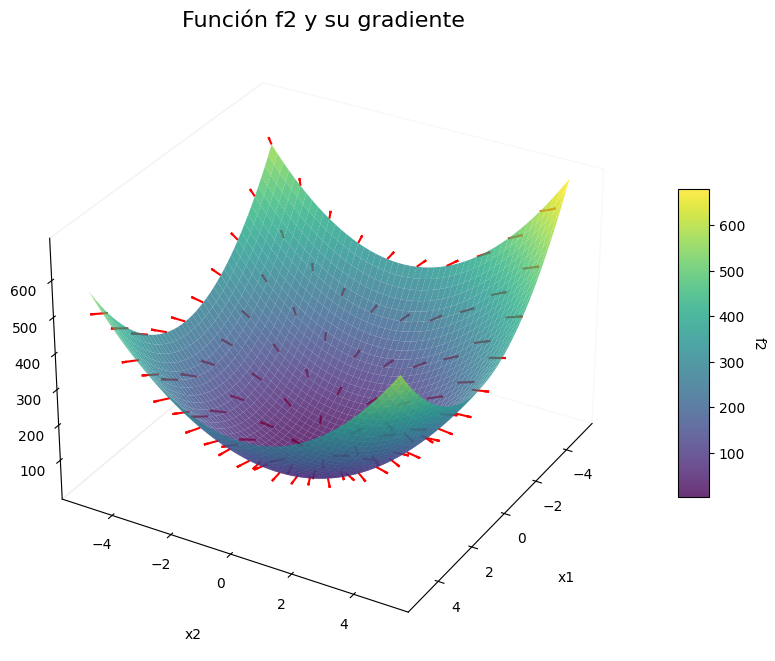

In [12]:
# Crear la figura y el eje 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar la función
surf = ax.plot_surface(x1_mesh, x2_mesh, f2_vals, cmap='viridis', alpha=0.8, edgecolor='none')

# Añadir la barra de color
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('f2', rotation=270, labelpad=15)

### VECTORES GRADIENTE
# Graficar el gradiente como vectores
skip = (slice(None, None, 10), slice(None, None, 10))  # Ajustar la frecuencia de los vectores
ax.quiver(
    x1_mesh[skip], x2_mesh[skip], f2_vals[skip],
    df2_dx1_vals_scaled[skip], df2_dx2_vals_scaled[skip], np.zeros_like(df2_dx1_vals_scaled[skip]),
    color='red', length=0.5, normalize=True
)

# Configurar etiquetas y título
ax.set_xlabel('x1', labelpad=20)
ax.set_ylabel('x2', labelpad=20)
ax.set_zlabel('f2', labelpad=20)
ax.set_title('Función f2 y su gradiente', fontsize=16)

# Ajustar la perspectiva de la cámara
ax.view_init(elev=30, azim=30)

# Mejorar la apariencia general
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.grid(False)

# Mostrar la gráfica
plt.show()